<a href="https://colab.research.google.com/github/chitranshp/Image-noise-reduction/blob/master/Denoising_images_using_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))


In [0]:
x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9
x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

In [0]:
def plot(x, p, labels = False):
    plt.figure(figsize = (20, 2))
    for i in range(1, 10):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i].reshape(28,28), cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
          plt.xlabel(np.argmax(p[i]))
    plt.show()

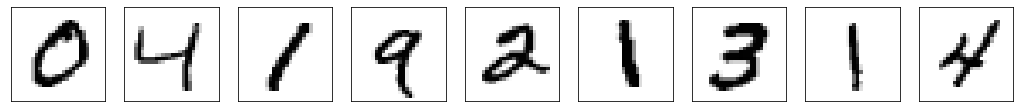

In [5]:
plot(x_train, None)

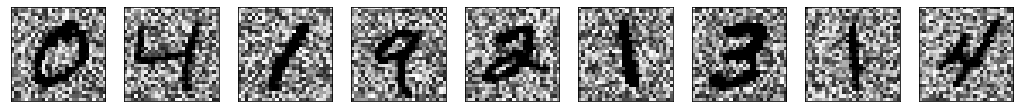

In [6]:
plot(x_train_noisy, None)

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') > 0.97):
            print("\n Achieved more than 97% accuracy, Hence terminating training!!!")
            self.model.stop_training = True
callbacks = myCallback()

In [0]:
classifier = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

classifier.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
classifier.fit(x_train, y_train, epochs = 20, callbacks = [callbacks])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2001 - accuracy: 0.9394
Epoch 2/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9743
 Achieved more than 97% accuracy, Hence terminating training!!!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0840 - accuracy: 0.9743


In [16]:
loss, acc = classifier.evaluate(x_train, y_train)
print('Training accuracy:{}\n'.format(acc))
loss, acc = classifier.evaluate(x_test, y_test)
print('Test accuracy:{}'.format(acc))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9827
Training accuracy:0.9826666712760925

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9743
Test accuracy:0.9743000268936157


In [20]:
print('Evaluating classifier on noisy images')
loss, acc = classifier.evaluate(x_train_noisy, y_train)
print('\nTraining accuracy:{}'.format(acc))
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print('\nTest accuracy:{}'.format(acc))


Evaluating classifier on noisy images
1875/1875 [==============================] - 3s 1ms/step - loss: 4.6969 - accuracy: 0.2420

Training accuracy:0.24199999868869781
313/313 [==============================] - 1s 3ms/step - loss: 4.7048 - accuracy: 0.2377

Test accuracy:0.23770000040531158
